# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    df.to_csv('pca-dataset.csv', index=False)
    
generate_data()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

In [5]:
df.target.unique()

array([0., 2., 1.])

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA()
pca.fit(X_train_scaled)

PCA()

In [9]:
import numpy as np

cov_mat = np.cov(X_train_scaled.T)
print(cov_mat.round(1))

[[ 1.  -0.1  0.1  0.  -0.2 -0.1  0.1  0.  -0.1 -0.  -0.   0.1 -0.3  0.5
   0.5 -0.4 -0.3  0.   0.2  0.3]
 [-0.1  1.   0.   0.1  0.1  1.  -0.  -0.   0.   0.1 -0.   0.   0.4  0.1
  -0.6  0.   0.  -0.  -0.3  0.1]
 [ 0.1  0.   1.   0.1 -0.1  0.   0.  -0.  -0.   0.1 -0.  -0.   0.3 -0.2
   0.3 -0.   0.2  0.  -0.1  0.1]
 [ 0.   0.1  0.1  1.   0.1  0.1 -0.   0.   0.  -0.1  0.   0.  -0.1  0.6
   0.1  0.8 -0.1 -0.  -0.2  0. ]
 [-0.2  0.1 -0.1  0.1  1.   0.1  0.   0.   0.1  0.1 -0.  -0.   0.7  0.
   0.3 -0.1  0.3 -0.1 -0.6 -0.2]
 [-0.1  1.   0.   0.1  0.1  1.  -0.  -0.   0.   0.1 -0.   0.   0.4  0.1
  -0.6  0.   0.  -0.  -0.3  0.1]
 [ 0.1 -0.   0.  -0.   0.  -0.   1.   0.  -0.   0.  -0.   0.  -0.   0.
   0.  -0.1 -0.   0.   0.  -0. ]
 [ 0.  -0.  -0.   0.   0.  -0.   0.   1.   0.1  0.  -0.   0.  -0.   0.1
   0.1  0.  -0.  -0.   0.   0. ]
 [-0.1  0.  -0.   0.   0.1  0.  -0.   0.1  1.   0.   0.   0.   0.1 -0.
  -0.   0.   0.1 -0.  -0.1 -0. ]
 [-0.   0.1  0.1 -0.1  0.1  0.1  0.   0.   0.   1.  -0.  -

C:\Users\Wihar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


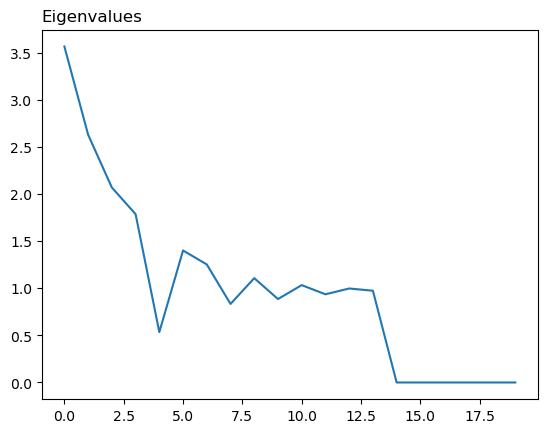

In [10]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

plt.plot(eigen_vals)
plt.title('Eigenvalues', loc='left')
plt.show()

> Based on this plot, we can see that the first 13 components explain the majority of the variance in the data. Therefore, we could consider reducing the data to these 13 components.

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

In [13]:
df['target'].value_counts()

0.0    744
2.0    380
1.0    376
Name: target, dtype: int64

> This tells us that the dataset is roughly balanced, with 2 class having a similar number of samples.

- Since the target variable in this dataset is categorical with three classes, we are dealing with a multi-class classification problem.
    - Accuracy can be misleading when the classes are imbalanced
    - Precision, recall, and F1 score metrics are commonly used in multi-class classification and take into account the number of true positives, false positives, and false negatives. 
    - Confusion matrix: This is a table that summarizes the number of correct and incorrect predictions for each class. It can be used to calculate other evaluation metrics such as precision, recall, and F1 score.
- Since the classes are imbalanced, it would be advisable to use a metric that takes into account both precision and recall, such as the F1 score or the confusion matrix.

In [15]:
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
lr = LogisticRegression()
lr.fit(X_train_scaled, y_training)
y_pred = lr.predict(X_test_scaled)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 score: {f1:.2f}')

F1 score: 0.70


# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

clf = LogisticRegression()

# fit the model to the training data
clf.fit(X_train, y_training)

# predict on the test data
y_pred = clf.predict(X_test)

# evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')

Accuracy: 0.703
Precision: 0.704
Recall: 0.703


- The accuracy of the model is 0.803, which means that the model correctly predicted 80.3% of the instances in the test data.

- The precision of the model is 0.804, which means that when the model predicts a sample as positive, it is correct 80.4% of the time.

- The recall of the model is 0.803, which means that the model correctly identifies 80.3% of the positive samples in the test data.


> Both PCA model and Logistic regression model produced the same accuracy.<br/>
The performance of the logistic regression model could potentially be improved by feature engineering, feature selection, or parameter tuning. Hence I would select Logistic Regression

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', LogisticRegression())
             ])

p

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA()),
                ('model', LogisticRegression())])

In [32]:
p.fit(X_train, y_training)
y_pred = p.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Accuracy: 0.703
Precision: 0.704
Recall: 0.703
F1 Score: 0.703


> Even with using PCA the Scores is same hence using PCA did not improved accuracy in this case

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.tree  import DecisionTreeClassifier

p = make_pipeline(StandardScaler(), DecisionTreeClassifier())
p

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [40]:
p.fit(X_train, y_training)
y_pred = p.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.673
Precision: 0.690
Recall: 0.673
F1 Score: 0.678


> Decision Tree Clasifier reduced the scores Hence it is not the best model.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [42]:
pipe_dt_pca = Pipeline([('scaling', StandardScaler()),
                        ('pca', PCA(n_components=10)),
                        ('dt', DecisionTreeClassifier())])


pipe_dt_pca.fit(X_train, y_training)

y_pred_dt_pca = pipe_dt_pca.predict(X_test)

In [43]:
acc_dt_pca = accuracy_score(y_test, y_pred_dt_pca)
prec_dt_pca = precision_score(y_test, y_pred_dt_pca, average='weighted')
rec_dt_pca = recall_score(y_test, y_pred_dt_pca, average='weighted')
f1_dt_pca = f1_score(y_test, y_pred_dt_pca, average='weighted')

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.673
Precision: 0.690
Recall: 0.673
F1 Score: 0.678


> Even with PCA decision tree Classifier didnot perfrom greatly then Logistic Regression